<a href="https://colab.research.google.com/github/TirendazAcademy/Deep-Learning-with-TensorFlow/blob/main/Pratical-Keras-Tutorials/Pratical_Keras_Functional_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Loading

In [1]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

# Data Preprocessing

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    housing.data, housing.target, random_state = 42
)

# Model Building

In [ ]:
import tensorflow as tf

In [ ]:
tf.random.set_seed(42)

In [ ]:
input_wide = tf.keras.layers.Input(shape=[5])
input_deep = tf.keras.layers.Input(shape=[6])

norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()

norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)

hidden1 = tf.keras.layers.Dense(30, activation = "relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation = "relu")(hidden1)

concat = tf.keras.layers.concatenate([norm_wide, hidden2])

output = tf.keras.layers.Dense(1)(concat)

In [ ]:
model = tf.keras.Model(inputs = [input_wide, input_deep],
                       outputs = [output])

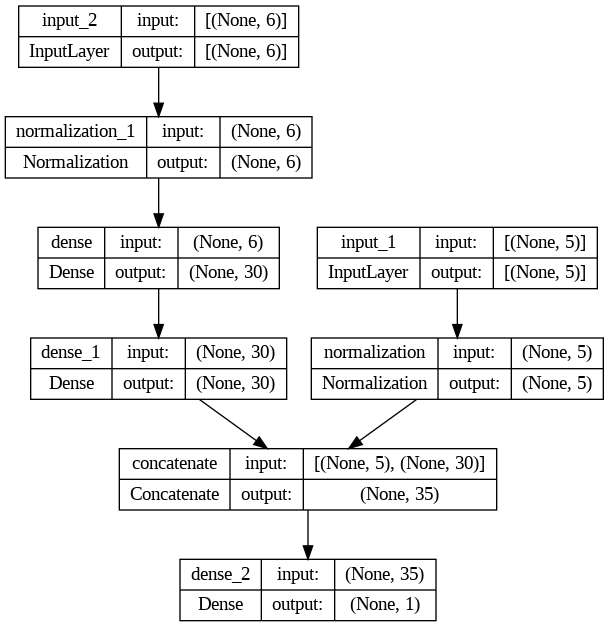

In [ ]:
tf.keras.utils.plot_model(model, "my_model.png", show_shapes = True)

# Model Compiling

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

model.compile(
    loss = "mse",
    optimizer = optimizer,
    metrics = ["RootMeanSquaredError"]
)

In [ ]:
X_train_wide, X_train_deep = X_train[:,:5], X_train[:,2:]
X_test_wide, X_test_deep = X_test[:,:5], X_test[:,2:]

# Model Training

In [ ]:
norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)

history = model.fit((X_train_wide, X_train_deep),
                    y_train,
                    epochs = 20,
                    validation_split= 0.2)

Epoch 1/20
387/387 [==============================] - 7s 4ms/step - loss: 1.3616 - root_mean_squared_error: 1.1669 - val_loss: 0.5607 - val_root_mean_squared_error: 0.7488
Epoch 2/20
387/387 [==============================] - 2s 4ms/step - loss: 0.4812 - root_mean_squared_error: 0.6937 - val_loss: 0.4781 - val_root_mean_squared_error: 0.6915
Epoch 3/20
387/387 [==============================] - 2s 5ms/step - loss: 0.4333 - root_mean_squared_error: 0.6582 - val_loss: 0.4329 - val_root_mean_squared_error: 0.6580
Epoch 4/20
387/387 [==============================] - 2s 4ms/step - loss: 0.3979 - root_mean_squared_error: 0.6308 - val_loss: 0.4150 - val_root_mean_squared_error: 0.6442
Epoch 5/20
387/387 [==============================] - 2s 4ms/step - loss: 0.3917 - root_mean_squared_error: 0.6258 - val_loss: 0.4092 - val_root_mean_squared_error: 0.6397
Epoch 6/20
387/387 [==============================] - 1s 4ms/step - loss: 0.3797 - root_mean_squared_error: 0.6162 - val_loss: 0.3869 - val_

# Model Evaluation

In [ ]:
test_scores = model.evaluate((X_test_wide, X_test_deep), y_test)

162/162 [==============================] - 0s 3ms/step - loss: 0.3226 - root_mean_squared_error: 0.5679


Prediction

In [ ]:
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]

In [ ]:
y_pred = model.predict((X_new_wide, X_new_deep))
y_pred

1/1 [==============================] - 0s 109ms/step


array([[0.36645722],
       [1.1630366 ],
       [3.6675177 ]], dtype=float32)

In [ ]:
y_test[:3]

array([0.477  , 0.458  , 5.00001])

Let's connect [YouTube](http://youtube.com/tirendazacademy) | [Medium](http://tirendazacademy.medium.com) | [Twitter](http://twitter.com/tirendazacademy) | [Instagram](https://www.instagram.com/tirendazacademy) | [GitHub](http://github.com/tirendazacademy) | [Linkedin](https://www.linkedin.com/in/tirendaz-academy) | [Kaggle](https://www.kaggle.com/tirendazacademy) 😎

## Resources
- Hands-on ML with Scikit-Learn & TensorFlow